# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [25]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [26]:
eps = 1e-8

Q = np.zeros((len(X), len(A)))
err = 1

while err > eps:
    
    new_Q = np.zeros((len(X), len(A)))
    for a, action in enumerate(A):
        new_Q[:,a] = c[:, a] + gamma * P[a].dot(np.min(Q, axis=1))
    
    err = abs(np.linalg.norm(new_Q - Q))
    Q = new_Q

---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [27]:
from random import random, randint

def greedy(Q_fun, x, epsilon=0.1):
    
    if random() < epsilon:
        return randint(0, len(A)-1)
    
    else:
        return np.random.choice(np.where(Q_fun[x] == np.min(Q_fun[x]))[0])
        

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

<IPython.core.display.Javascript object>


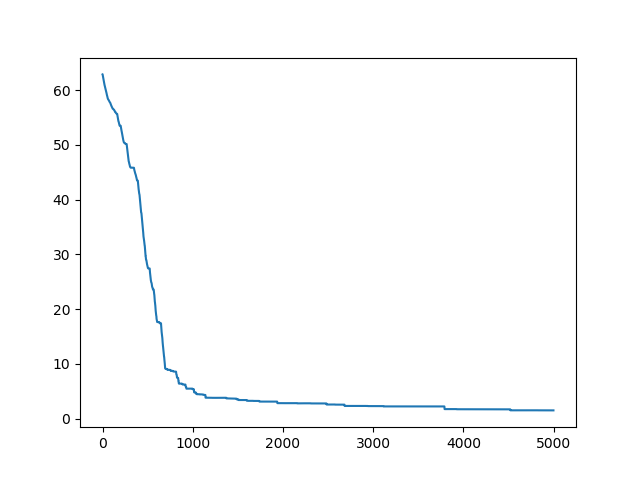

In [28]:
def alpha(x, a):
    return 1 / (N[x,a] + 1)

N = np.zeros((len(X), len(A)))
Q_t = np.zeros((len(X), len(A)))
C_t = np.zeros((len(X), len(A)))

P_u = np.eye(len(X))
P_d = np.eye(len(X))
P_l = np.eye(len(X))
P_r = np.eye(len(X))

P_t = [P_u, P_d, P_l, P_r]

x_t = 1

errs = []

for i in range(5000):
    
    a_t = greedy(Q_t, x_t)
    c_t = c[x_t, a_t]
    N[x_t, a_t] += 1
    x_t1 = np.random.choice(len(X), p = P[a_t][x_t])
    
    for y in range(len(X)):
        P_t[a_t][x_t][y] = P_t[a_t][x_t][y] + alpha(x_t, a_t) * ((1 if x_t1 == y else 0) - P_t[a_t][x_t][y])
    
    C_t[x_t, a_t] = C_t[x_t][a_t] + alpha(x_t, a_t) * (c_t - C_t[x_t][a_t])
    
    Q_t[x_t, a_t] = C_t[x_t, a_t] + gamma * P_t[a_t][x_t].dot(np.min(Q_t, axis=1))
    
    if x_t == X.index("6BR"):
        x_t = np.random.choice(len(X))
    
    else:
        x_t = x_t1
        
    errs.append(np.linalg.norm(Q - Q_t))

plt.plot(errs)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

<IPython.core.display.Javascript object>


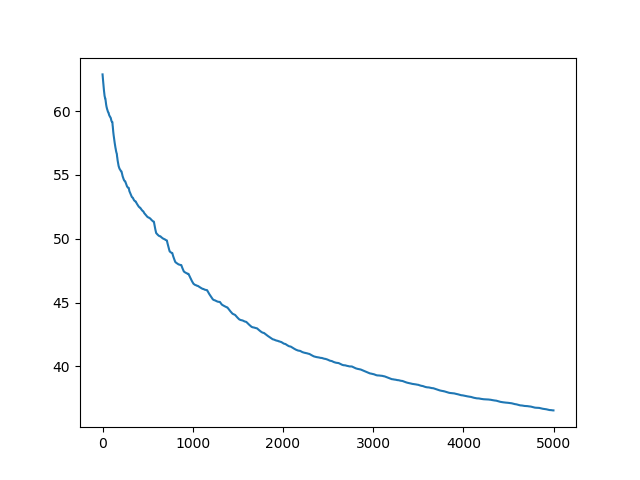

In [29]:
def alpha(x, a):
    return 1 / (N[x,a] + 1)

N = np.zeros((len(X), len(A)))
Q_t = np.zeros((len(X), len(A)))

x_t = 1

errs = []

for i in range(5000):
    
    a_t = np.random.choice(np.where(Q_t[x_t] == np.min(Q_t[x_t]))[0])
    c_t = c[x_t, a_t]
    N[x_t, a_t] += 1
    x_t1 = np.random.choice(len(X), p = P[a_t][x_t])
    
    Q_t[x_t, a_t] = Q_t[x_t, a_t] + alpha(x_t, a_t) * (c_t + gamma * np.min(Q_t[x_t1]) - Q_t[x_t, a_t])
    
    if x_t == X.index("6BR"):
        x_t = np.random.choice(len(X))
    
    else:
        x_t = x_t1
        
    errs.append(np.linalg.norm(Q - Q_t))

plt.plot(errs)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

<IPython.core.display.Javascript object>


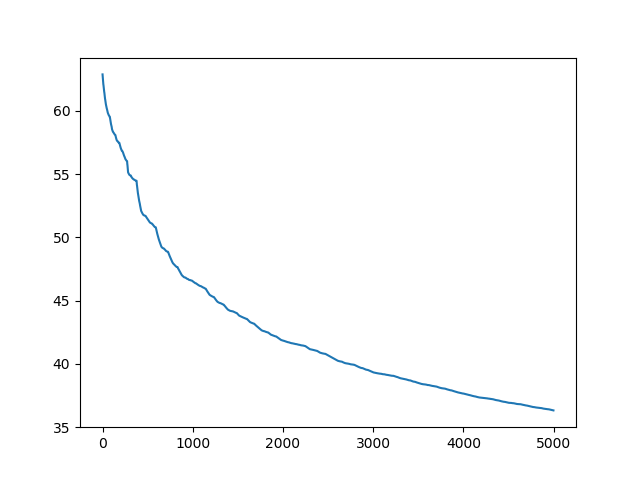

In [30]:
def alpha(x, a):
    return 1 / (N[x,a] + 1)

N = np.zeros((len(X), len(A)))
Q_t = np.zeros((len(X), len(A)))

x_t = 1

errs = []

for i in range(5000):
    
    a_t = np.random.choice(np.where(Q_t[x_t] == np.min(Q_t[x_t]))[0])
    c_t = c[x_t, a_t]
    N[x_t, a_t] += 1
    x_t1 = np.random.choice(len(X), p = P[a_t][x_t])
    a_t1 = np.random.choice(np.where(Q_t[x_t1] == np.min(Q_t[x_t1]))[0])
    
    Q_t[x_t, a_t] = Q_t[x_t, a_t] + alpha(x_t, a_t) * (c_t + gamma * Q_t[x_t1, a_t1] - Q_t[x_t, a_t])
    
    if x_t == X.index("6BR"):
        x_t = np.random.choice(len(X))
    
    else:
        x_t = x_t1
        
    errs.append(np.linalg.norm(Q - Q_t))

plt.plot(errs)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Verificamos que o _model-based method_ converge significativamente mais rápido que os _value-based methods_.

Pensamos que os métodos baseados em modelos convirjam mais rápido e para uma solução mais próxima da ótima porque tanto o ambiente como a função de custo são relativamente simples.

Contrariamente, os métodos baseado em valores, funcionam melhor de um modo geral, mas podem demorar mais tempo a convergir.